<a href="https://colab.research.google.com/github/chloehmiri/Supervised-Learning-Regression-Analysis-Work/blob/main/Regression_Tree_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression Trees**

In [ ]:
install.packages("rpart")
install.packages("rpart.plot")
library(rpart)
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("AmesHousing")
library(AmesHousing)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
ames <- make_ames() #make_ames() creates a data set of new properties.
nrow(ames)

[1] 2930

In [ ]:
# If you can take look at the data set like we did, that is great EDA to get better look at the data as well
# From EDA, take the mean, var
#draw some graphs
#make some tables

# We would like to use RT(regression tress) algorithm to predict the sale price of
# the houses

In [ ]:
str(ames)
# traget features: Sale_Price (supervised learning algorithm), we have label target feature
# target feature: numerical

tibble [2,930 × 81] (S3: tbl_df/tbl/data.frame)
 $ MS_SubClass       : Factor w/ 16 levels "One_Story_1946_and_Newer_All_Styles",..: 1 1 1 1 6 6 12 12 12 6 ...
 $ MS_Zoning         : Factor w/ 7 levels "Floating_Village_Residential",..: 3 2 3 3 3 3 3 3 3 3 ...
 $ Lot_Frontage      : num [1:2930] 141 80 81 93 74 78 41 43 39 60 ...
 $ Lot_Area          : int [1:2930] 31770 11622 14267 11160 13830 9978 4920 5005 5389 7500 ...
 $ Street            : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley             : Factor w/ 3 levels "Gravel","No_Alley_Access",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Lot_Shape         : Factor w/ 4 levels "Regular","Slightly_Irregular",..: 2 1 2 1 2 2 1 2 2 1 ...
 $ Land_Contour      : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 2 4 4 ...
 $ Utilities         : Factor w/ 3 levels "AllPub","NoSeWa",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Lot_Config        : Factor w/ 5 levels "Corner","CulDSac",..: 1 5 1 1 5 5 5 5 5 5 ...
 $ Land_Slope        : Factor

**Question**: Is RT (regression trees) appropriate to analyze this data set?

**Answer**: YES, because RT target feature is numerical

- KNN's target feature is categorical / nominal
- total 2930 examples in this data set

In [ ]:
# Split into Train and Test Data
# Let's split the AMES data set to about 80% Train and 20% Test data

2930*0.8 # number of Training Data, remaining data = Test Data
# Train Data [1:2344]
# Test Data [2345:2930]

[1] 2344

In [ ]:
# All of you extract the data into training and testing data sets
train <- ames[1:2344, ]
test <- ames[2345:2930, ]

In [ ]:
# Now, we have a train and test data sets
# We can create our tree
# since it is a regression tree, we are using the anova method
# difference between multiple groups

# ANOVA (1) Dependent(Y): numerical (2) Independent (Xs): Categorical

model_ames <- rpart(Sale_Price ~ ., train, method="anova")
# rpart(target feature ~ ) # . means take all the remaining features
model_ames

n= 2344 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 2344 1.529785e+13 182073.40  
   2) Overall_Qual=Very_Poor,Poor,Fair,Below_Average,Average,Above_Average,Good 1940 4.604520e+12 156791.50  
     4) Neighborhood=North_Ames,Old_Town,Edwards,Sawyer,Mitchell,Brookside,Iowa_DOT_and_Rail_Road,South_and_West_of_Iowa_State_University,Meadow_Village,Briardale,Northpark_Villa,Blueste 1148 1.488153e+12 132472.10  
       8) First_Flr_SF< 1089.5 746 6.165952e+11 120729.70  
        16) Overall_Qual=Very_Poor,Poor,Fair,Below_Average 163 1.147795e+11  92203.67 *
        17) Overall_Qual=Average,Above_Average,Good 583 3.320933e+11 128705.20 *
       9) First_Flr_SF>=1089.5 402 5.778140e+11 154262.70 *
     5) Neighborhood=College_Creek,Somerset,Northridge_Heights,Gilbert,Northwest_Ames,Sawyer_West,Crawford,Timberland,Northridge,Stone_Brook,Clear_Creek,Bloomington_Heights,Veenker,Green_Hills 792 1.453246e+12 192042.30  
      10) Gr_Liv_Area< 1749.5 577 6.658951e+11 178

**Question**: Which feature is the MOST PREDICTIVE FEATURE (in terms of predicting the sale price)?

**Answer**: Overall Quality

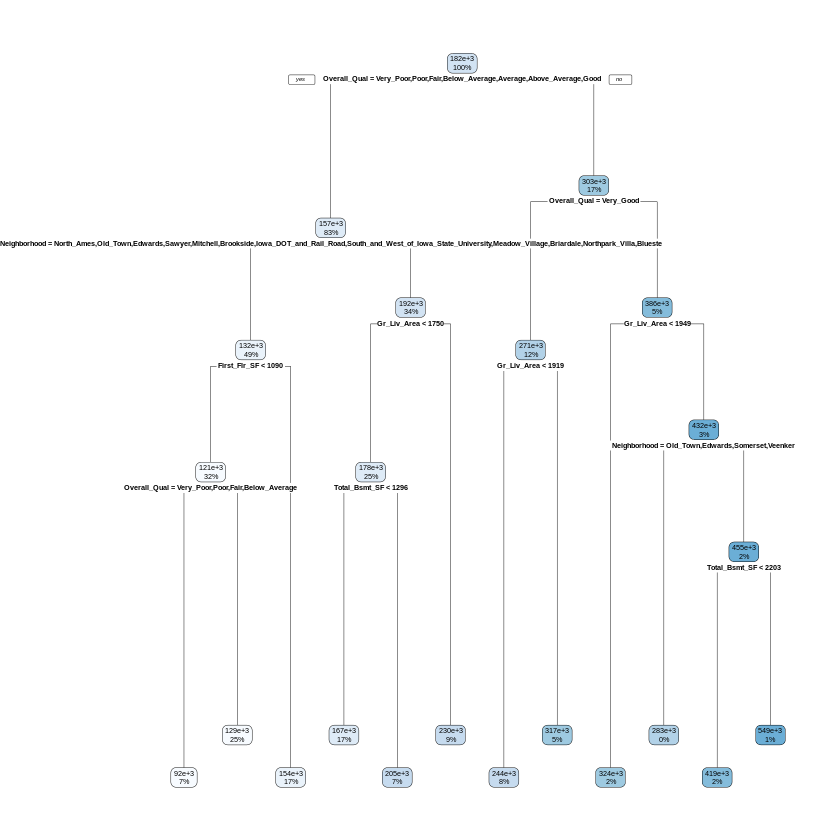

In [ ]:
rpart.plot(model_ames)

**Question**: (1) How many decision nodes are there? (2) How many terminal/leaf nodes are there? (3) Total number of nodes?

**Answer**: (1) 11 nodes (# of kind of square) (2) 12 (3) 23 nodes of total

In [ ]:
# be careful decision

In [ ]:
# How many feature did we end up splitting data on?
printcp(model_ames)

# look at the last line under "nsplit" in the table columns


Regression tree:
rpart(formula = Sale_Price ~ ., data = train, method = "anova")

Variables actually used in tree construction:
[1] First_Flr_SF  Gr_Liv_Area   Neighborhood  Overall_Qual  Total_Bsmt_SF

Root node error: 1.5298e+13/2344 = 6526385818

n= 2344 

         CP nsplit rel error  xerror     xstd
1  0.470293      0   1.00000 1.00119 0.055571
2  0.108716      1   0.52971 0.53132 0.028660
3  0.070985      2   0.42099 0.42363 0.027938
4  0.027095      3   0.35001 0.35866 0.019981
5  0.023747      4   0.32291 0.34076 0.020435
6  0.021269      5   0.29916 0.32885 0.020108
7  0.019202      6   0.27789 0.31597 0.019863
8  0.015100      7   0.25869 0.28229 0.017265
9  0.012869      8   0.24359 0.28898 0.020258
10 0.011789      9   0.23072 0.28160 0.020095
11 0.011095     10   0.21894 0.27942 0.020707
12 0.010000     11   0.20784 0.26761 0.020102


In [ ]:
# so now with the remaining 20% of testing data set
# Let's see how the model does in terms of predicting sale price of the houses

predictions <- predict(model_ames, test)
predictions
nrow(test)

1         2         3         4         5         6         7         8 
229519.67 166508.72 166508.72 229519.67 229519.67 205093.89 229519.67 166508.72 
        9        10        11        12        13        14        15        16 
166508.72 229519.67 229519.67 166508.72 166508.72 166508.72 166508.72 154262.72 
       17        18        19        20        21        22        23        24 
 92203.67  92203.67  92203.67 154262.72 128705.19 128705.19 128705.19 128705.19 
       25        26        27        28        29        30        31        32 
128705.19 128705.19 128705.19 128705.19 128705.19 128705.19 154262.72 128705.19 
       33        34        35        36        37        38        39        40 
128705.19 128705.19 418522.61 418522.61 418522.61 243505.06 418522.61 205093.89 
       41        42        43        44        45        46        47        48 
323522.00 323522.00 316579.48 316579.48 418522.61 316579.48 418522.61 418522.61 
       49        50        51        52        53        54        55        56 
316579.48 316579.48 316579.48 323522.00 316579.48 323522.00 323522.00 323522.00 
       57        58        59        60        61        62        63        64 
418522.61 243505.06 243505.06 205093.89 323522.00 205093.89 205093.89 323522.00 
       65        66        67        68        69        70        71        72 
323522.00 205093.89 205093.89 166508.72 166508.72 166508.72 229519.67 205093.89 
       73        74        75        76        77        78        79        80 
166508.72 316579.48 166508.72 166508.72 205093.89 243505.06 205093.89 205093.89 
       81        82        83        84        85        86        87        88 
205093.89 166508.72 166508.72 205093.89 243505.06 205093.89 229519.67 166508.72 
       89        90        91        92        93        94        95        96 
243505.06 166508.72 316579.48 166508.72 166508.72 229519.67 229519.67 166508.72 
       97        98        99       100       101       102       103       104 
229519.67 229519.67 316579.48 316579.48 316579.48 418522.61 418522.61 316579.48 
      105       106       107       108       109       110       111       112 
316579.48 316579.48 418522.61 316579.48 316579.48 316579.48 316579.48 243505.06 
      113       114       115       116       117       118       119       120 
316579.48 243505.06 205093.89 243505.06 243505.06 282845.00 243505.06 316579.48 
      121       122       123       124       125       126       127       128 
166508.72 166508.72 166508.72 166508.72 166508.72 166508.72 166508.72 205093.89 
      129       130       131       132       133       134       135       136 
166508.72 166508.72 166508.72 166508.72 166508.72 229519.67 166508.72 166508.72 
      137       138       139       140       141       142       143       144 
205093.89 166508.72 166508.72 166508.72 166508.72 128705.19 154262.72 154262.72 
      145       146       147       148       149       150       151       152 
154262.72 154262.72 128705.19 128705.19 128705.19 128705.19 128705.19 128705.19 
      153       154       155       156       157       158       159       160 
154262.72 128705.19 229519.67 316579.48 316579.48 316579.48 229519.67 243505.06 
      161       162       163       164       165       166       167       168 
166508.72 243505.06 166508.72 166508.72 166508.72 166508.72 166508.72 166508.72 
      169       170       171       172       173       174       175       176 
166508.72 166508.72 166508.72 243505.06 243505.06 166508.72 243505.06 243505.06 
      177       178       179       180       181       182       183       184 
243505.06 243505.06 323522.00 166508.72 229519.67 229519.67 166508.72 229519.67 
      185       186       187       188       189       190       191       192 
229519.67 205093.89 166508.72 128705.19 128705.19 128705.19 128705.19 128705.19 
      193       194       195       196       197       198       199       200 
128705.19 128705.19 154262.72 154262.72

[1] 586

In [ ]:
# so now that our tree made some predictions (on the old, labeled data set)
# we can now compare those predictions with the actual numbers (prices of houses)
# in order to do that, we are going to calculate the Mean Absolute Error (MAE)

# make Mean Absolute Error function
MAE <- function(actual, predicted){ mean( abs(actual-predicted)    )  }

In [ ]:
# we hope that MAE is small number
MAE(test$Sale_Price, predictions)

[1] 25578.47